<h3 style="color:white; font-size:22px; font-weight:bold;">
Cardiotocogram (CTG): The dataset contains 2126 rows and 22 columns. 
A brief description is provided below:
</h3>

<small style="font-size:14px; font-weight:lighter; color:white;">
1. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">baseline value</span>: The baseline fetal heart rate (FHR) in beats per minute.<br>
2. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">accelerations</span>: Number of accelerations per second, which are temporary increases in FHR.<br>
3. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">fetal_movement</span>: Number of fetal movements per second.<br>
4. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">uterine_contractions</span>: Number of uterine contractions per second.<br>
5. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">light_decelerations</span>: Number of light decelerations per second, which are temporary decreases in FHR.<br>
6. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">severe_decelerations</span>: Number of severe decelerations per second.<br>
7. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">prolongued_decelerations</span>: Number of prolonged decelerations per second.<br>
8. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">abnormal_short_term_variability</span>: Percentage of time with abnormal short-term variability in FHR.<br>
9. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">mean_value_of_short_term_variability</span>: Mean value of short-term variability in FHR.<br>
10. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">percentage_of_time_with_abnormal_long_term_variability</span>: Percentage of time with abnormal long-term variability in FHR.<br>
11. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">mean_value_of_long_term_variability</span>: Mean value of long-term variability in FHR.<br>
12. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_width</span>: Width of the histogram of FHR values.<br>
13. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_min</span>: Minimum value in the histogram of FHR values.<br>
14. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_max</span>: Maximum value in the histogram of FHR values.<br>
15. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_number_of_peaks</span>: Number of peaks in the histogram of FHR values.<br>
16. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_number_of_zeroes</span>: Number of zeroes in the histogram of FHR values.<br>
17. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_mode</span>: Mode of the histogram of FHR values.<br>
18. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_mean</span>: Mean value of the histogram of FHR values.<br>
19. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_median</span>: Median value of the histogram of FHR values.<br>
20. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_variance</span>: Variance of the histogram of FHR values.<br>
21. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">histogram_tendency</span>: Tendency of the histogram of FHR values (e.g., skewness).<br>
22. <span style="font-style:italic; font-weight:600; color:#f0f0f0;">fetal_health</span>: The target variable indicating the health status of the fetus (<i>1: Normal</i>, <i>2: Suspect</i>, <i>3: Pathological</i>).
</small>

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import joblib

In [3]:
df = pd.read_csv("../data/fetal_health.csv")

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
df.head(15) 

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,0.0,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,15.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.000,0.002,0.000,0.0,0.000,84.0,0.5,5.0,13.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.000,0.003,0.000,0.0,0.000,86.0,0.3,6.0,10.6,68.0,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
df.shape

(2126, 22)

In [9]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [10]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [11]:
df.duplicated().sum()

13

In [12]:
df.drop_duplicates(inplace=True) 

In [13]:
df.shape

(2113, 22)

In [14]:
df.count()

baseline value                                            2113
accelerations                                             2113
fetal_movement                                            2113
uterine_contractions                                      2113
light_decelerations                                       2113
severe_decelerations                                      2113
prolongued_decelerations                                  2113
abnormal_short_term_variability                           2113
mean_value_of_short_term_variability                      2113
percentage_of_time_with_abnormal_long_term_variability    2113
mean_value_of_long_term_variability                       2113
histogram_width                                           2113
histogram_min                                             2113
histogram_max                                             2113
histogram_number_of_peaks                                 2113
histogram_number_of_zeroes                             

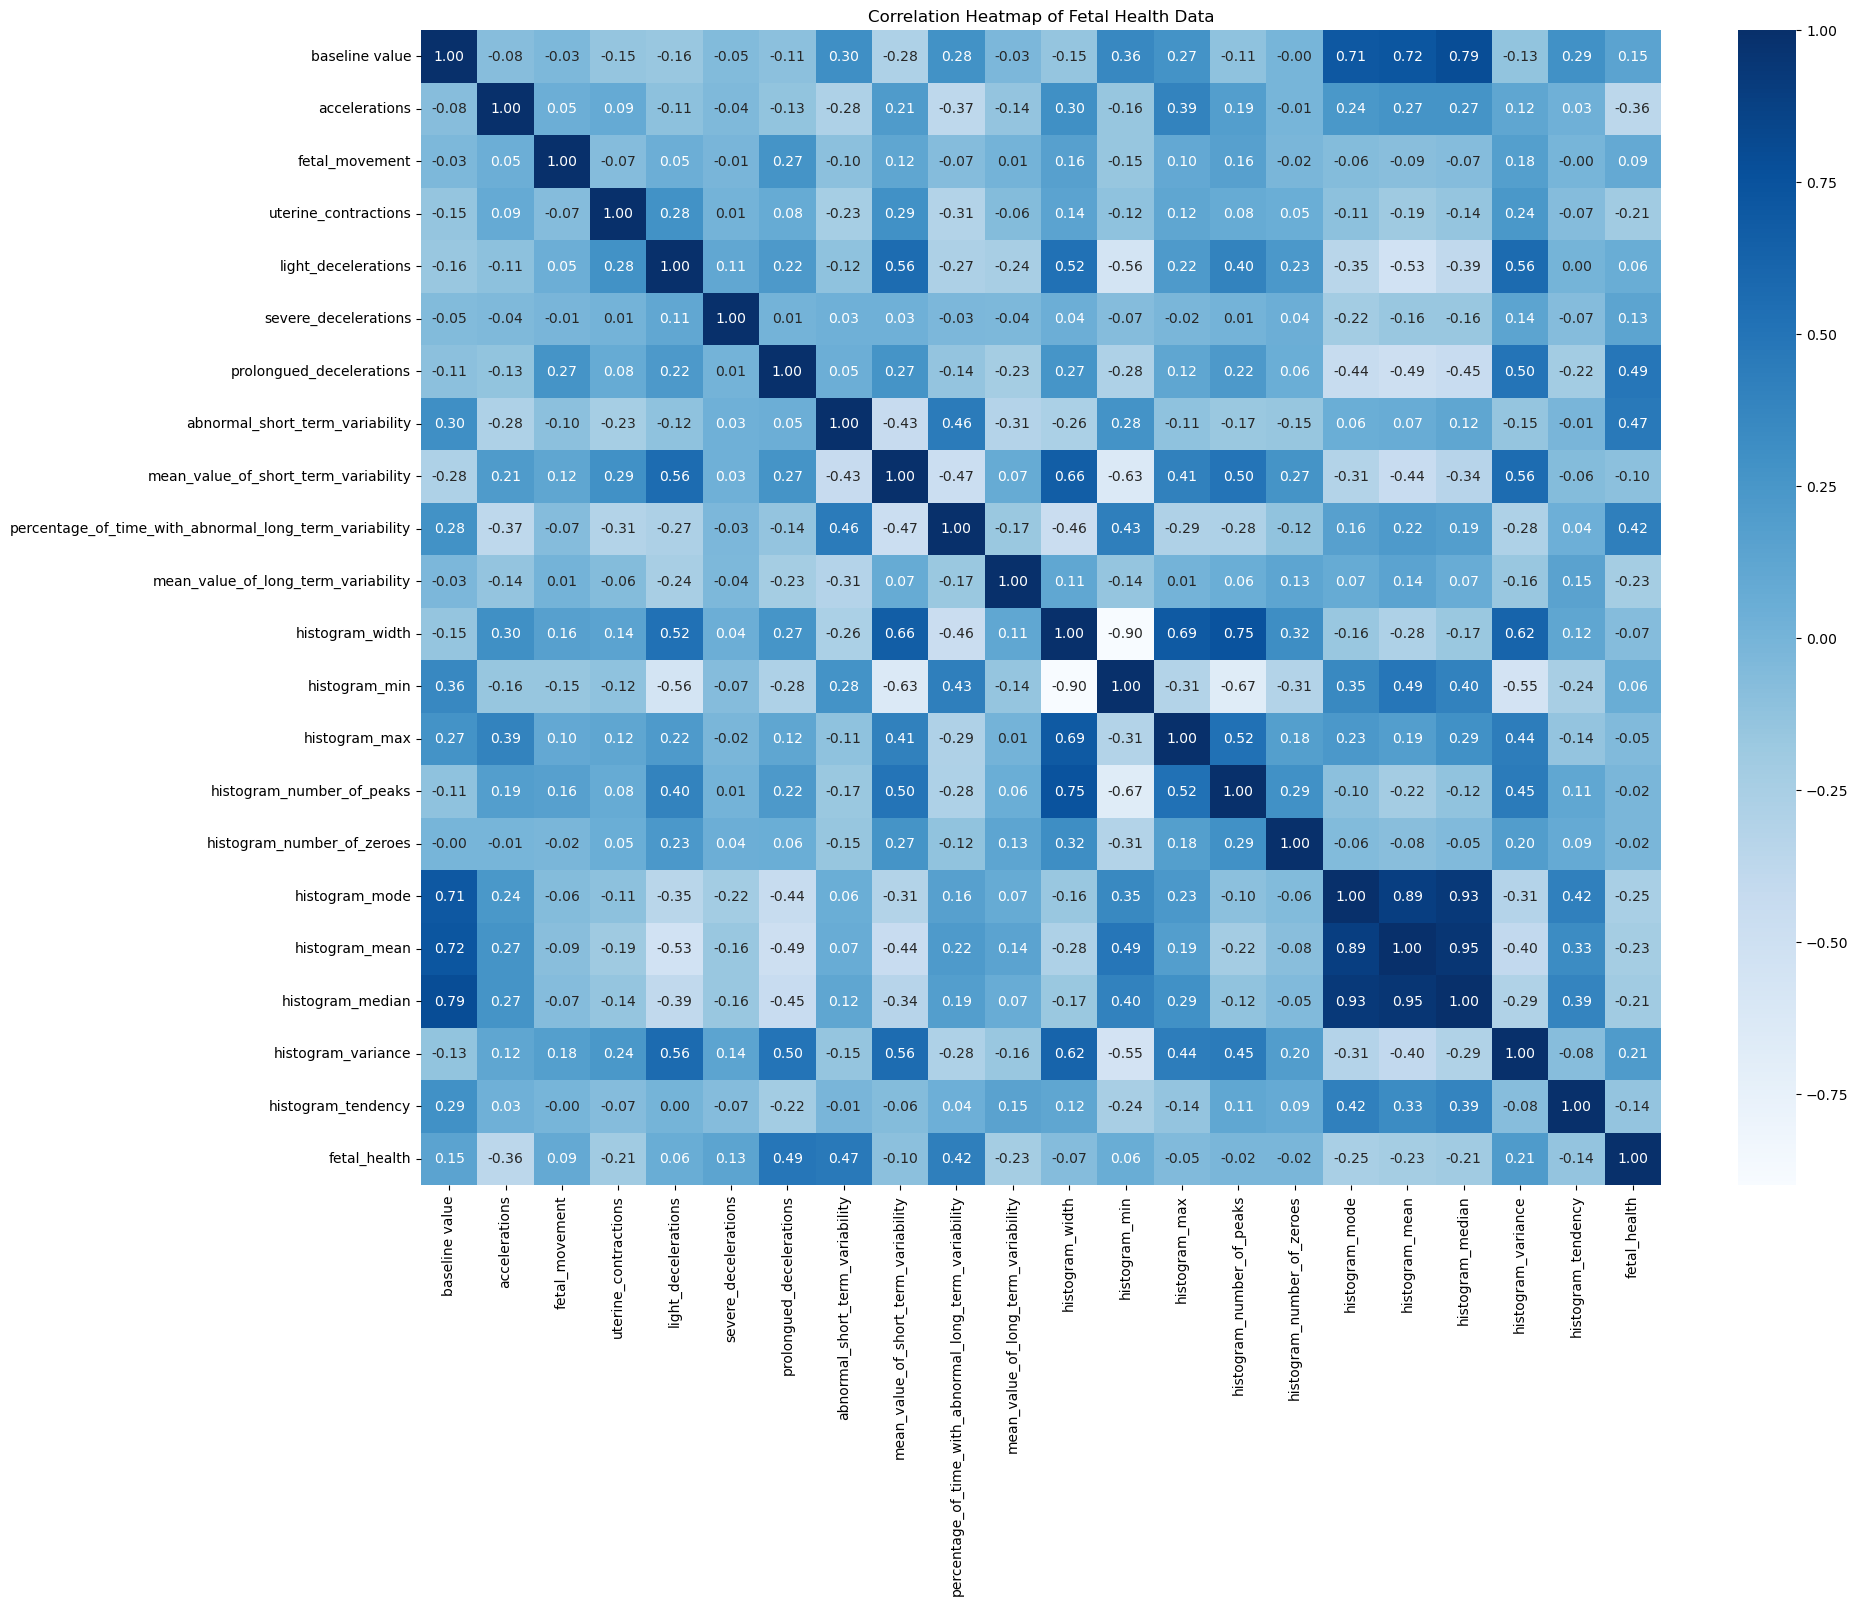

In [15]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap of Fetal Health Data')
plt.show()

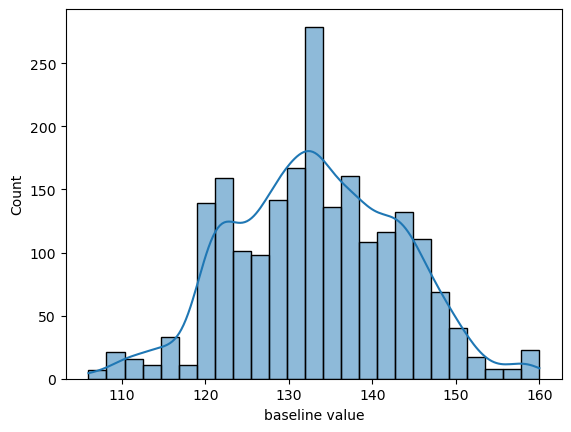

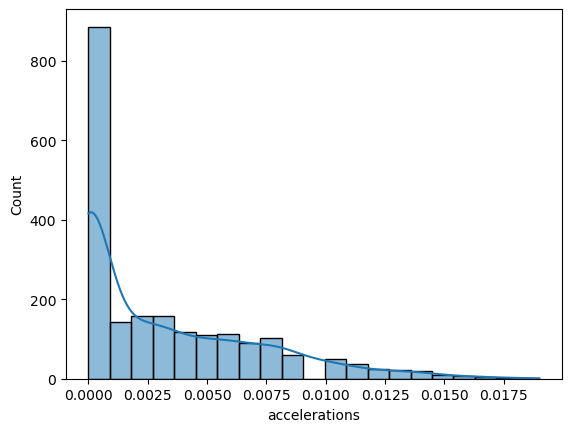

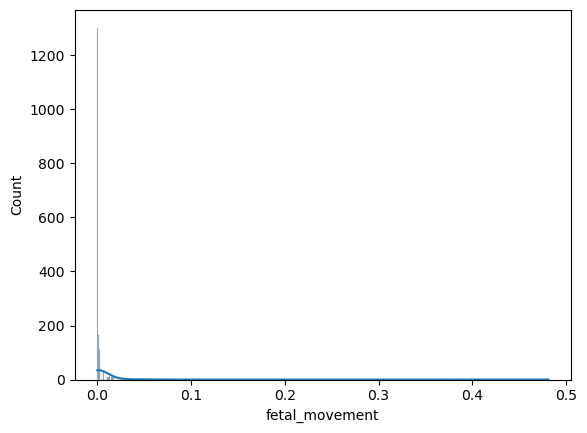

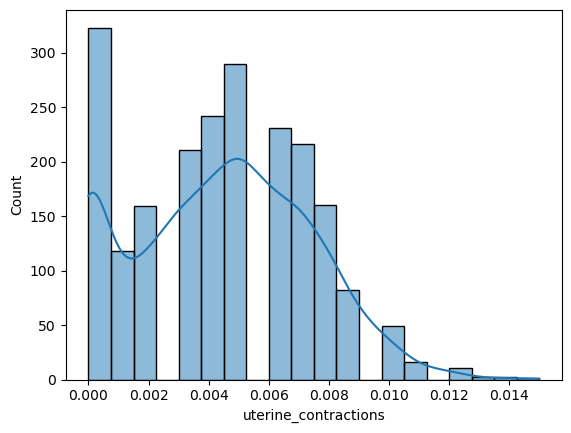

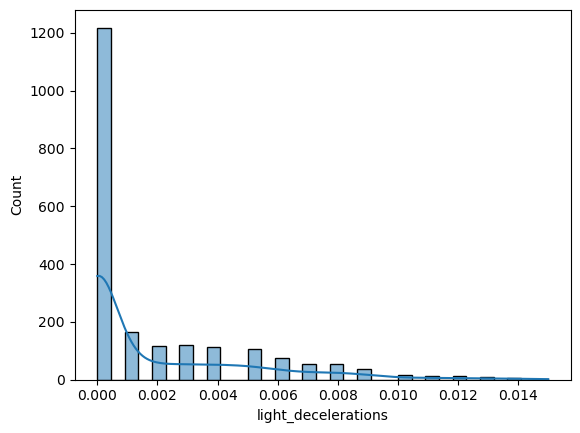

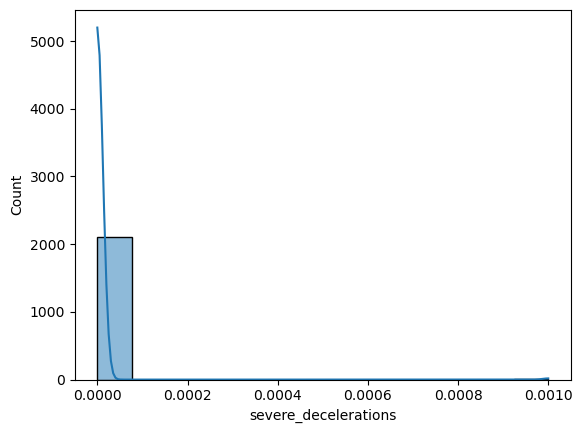

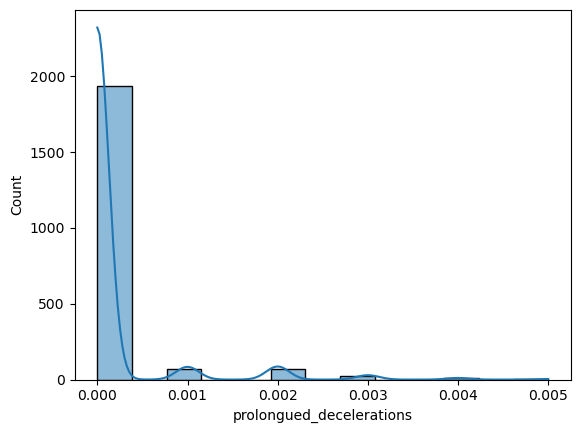

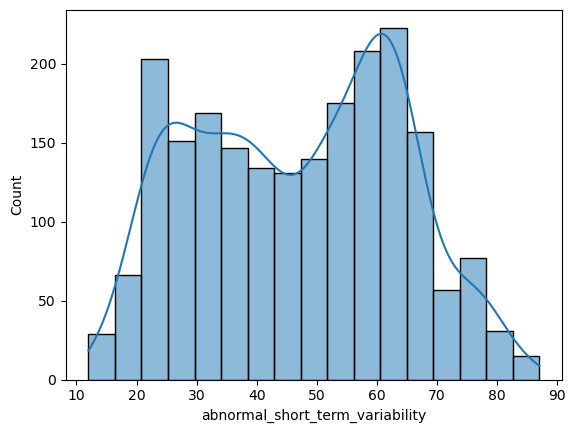

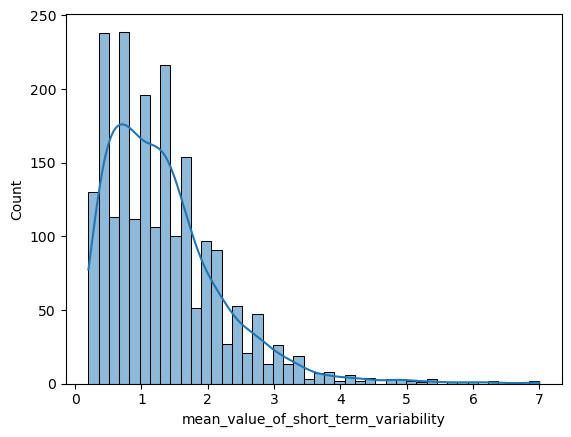

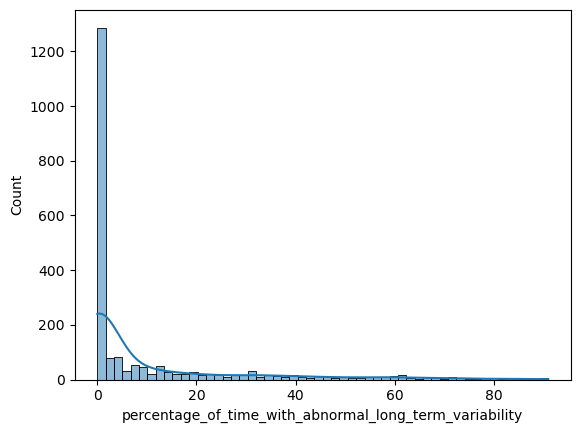

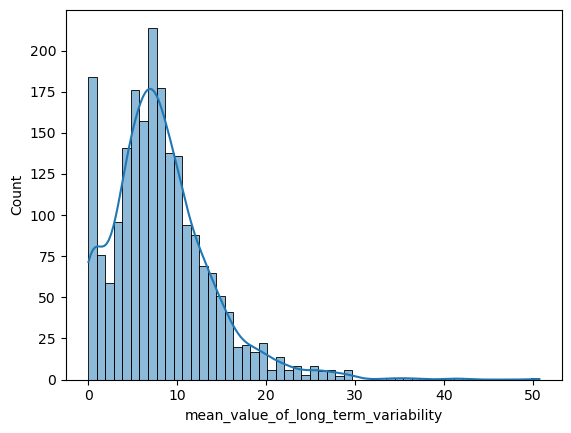

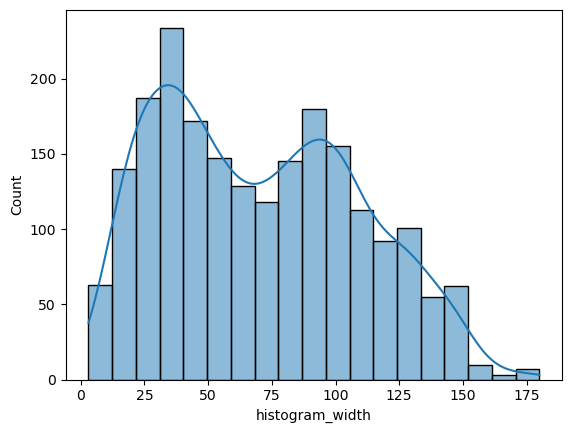

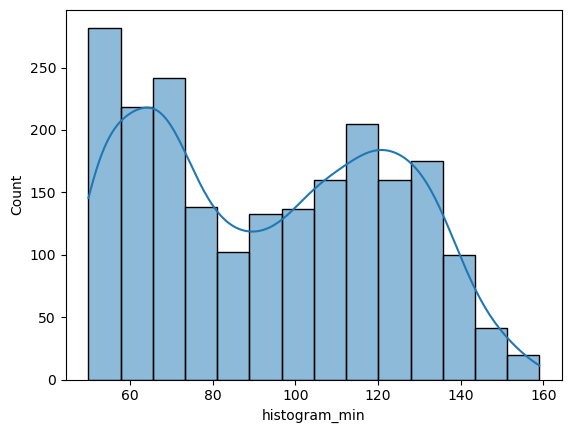

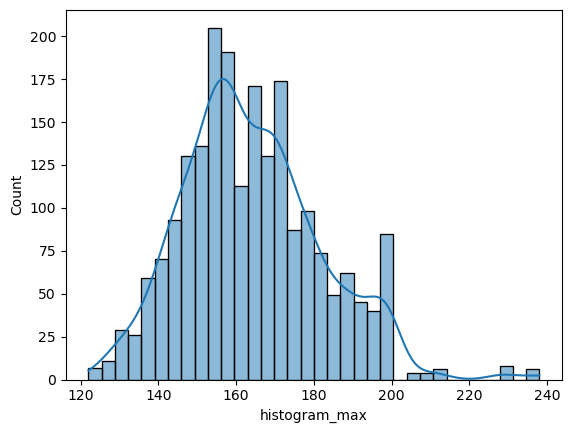

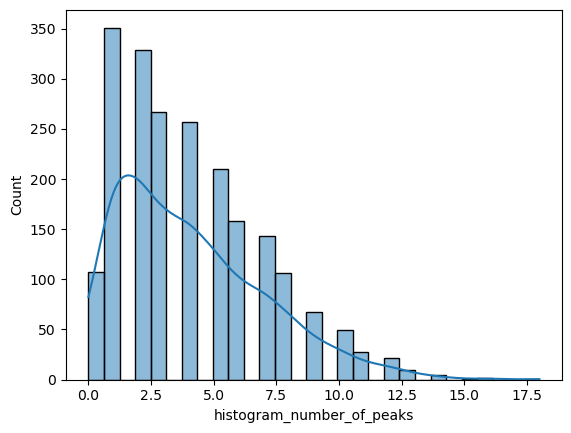

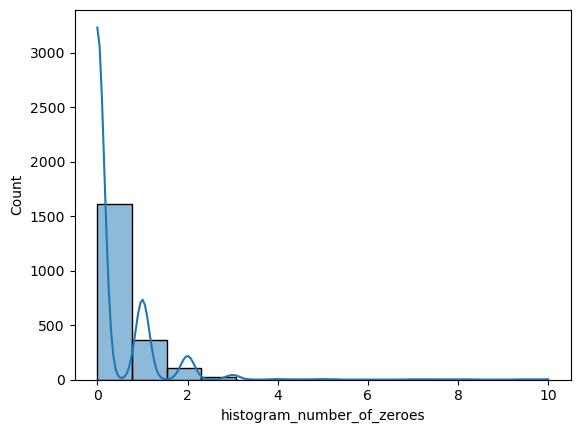

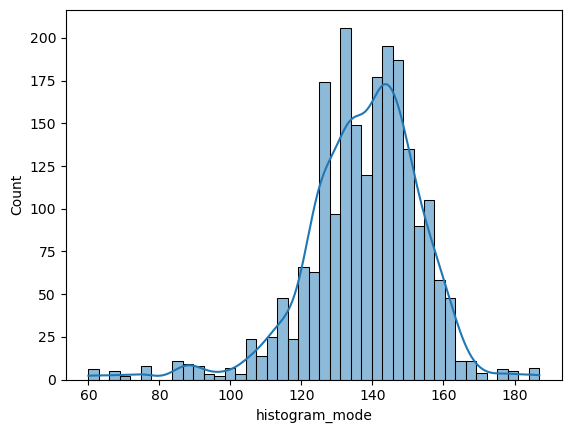

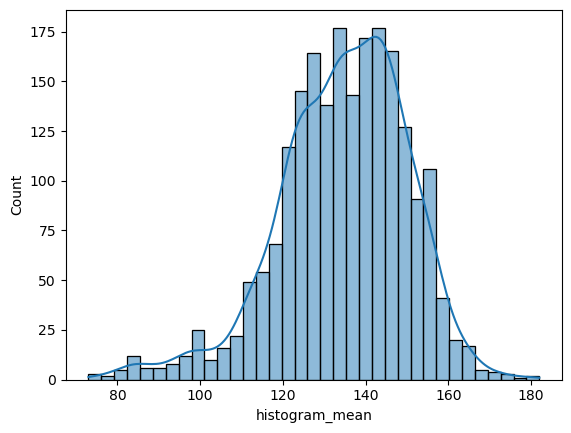

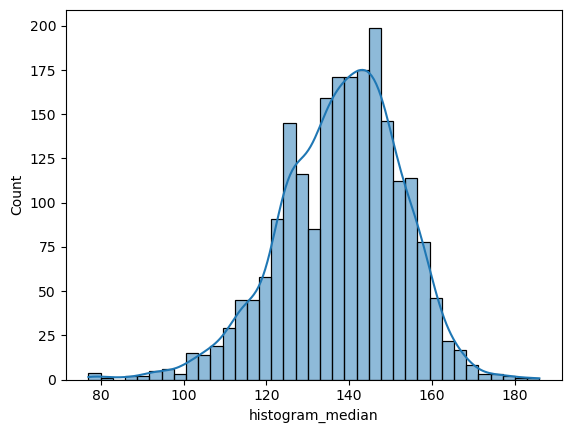

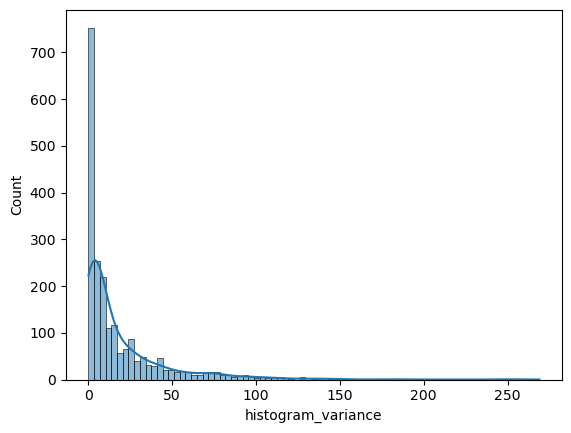

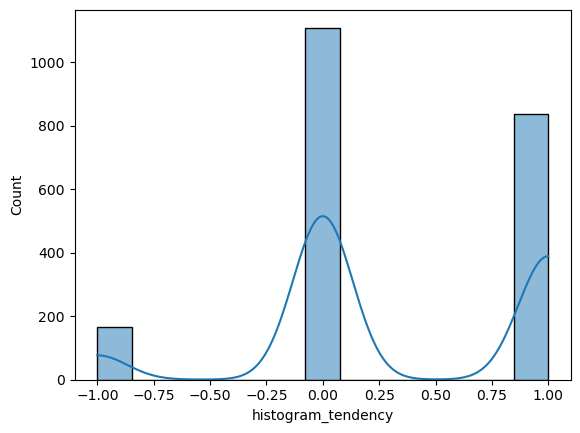

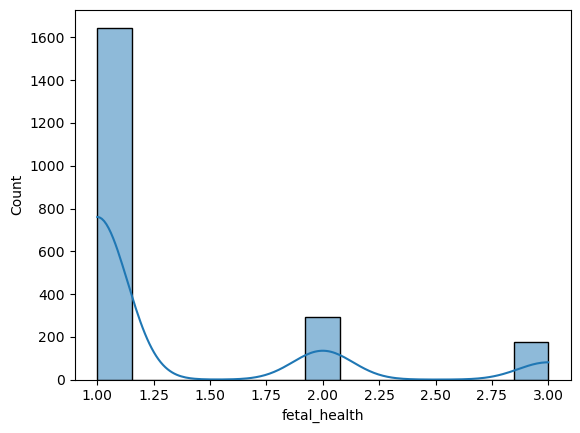

In [16]:
for i in df.columns:
    sns.histplot(df[i], kde=True)
    plt.show() 

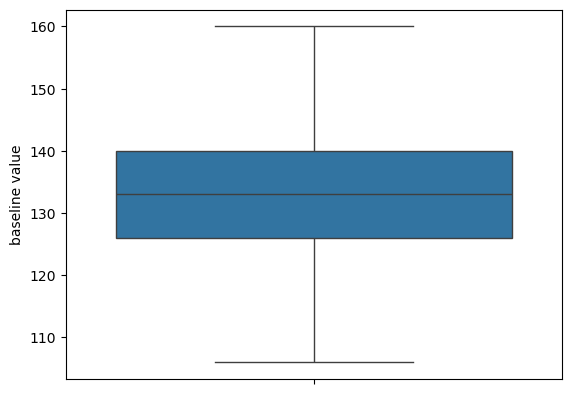

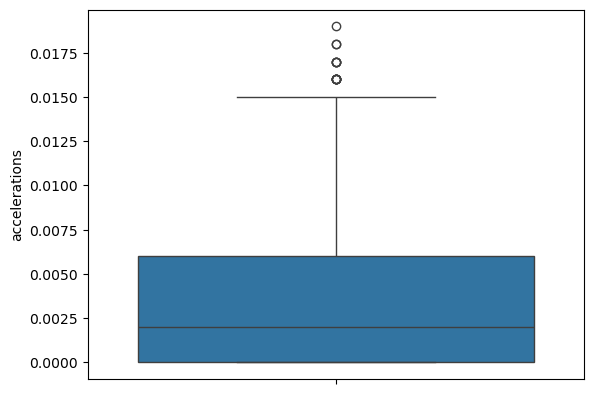

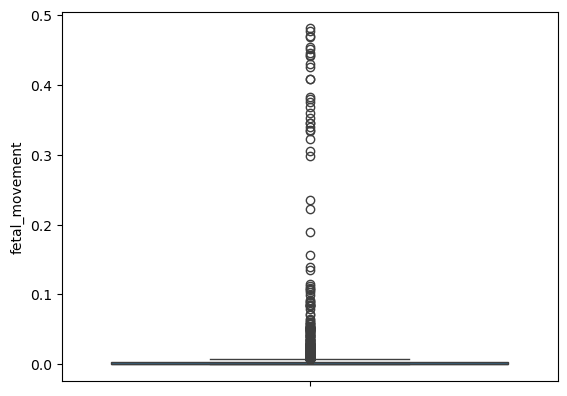

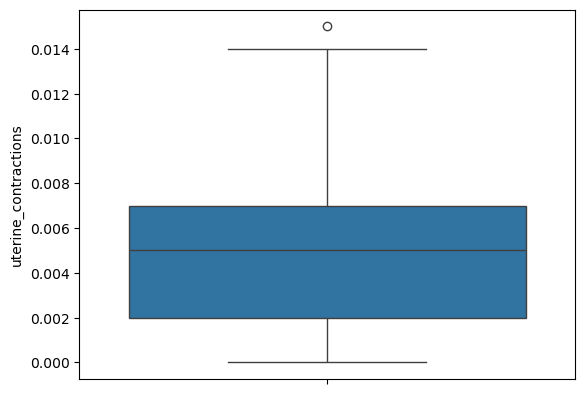

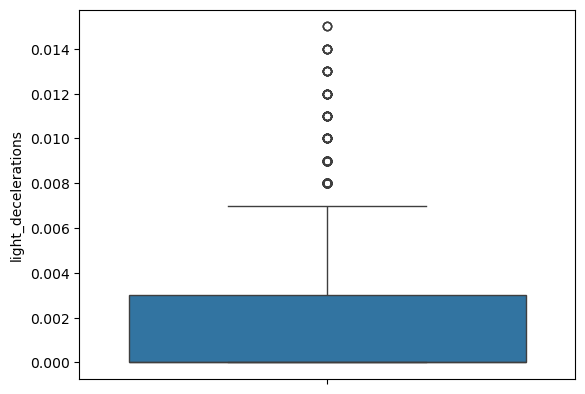

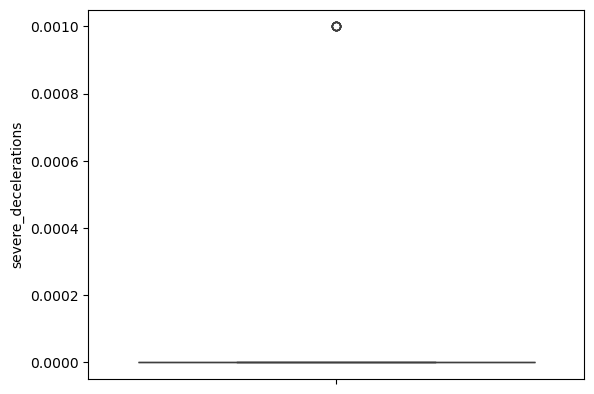

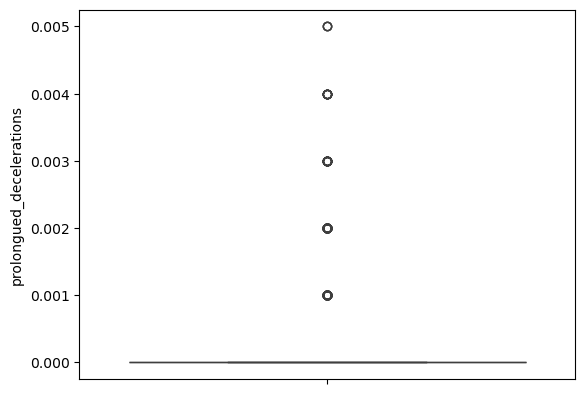

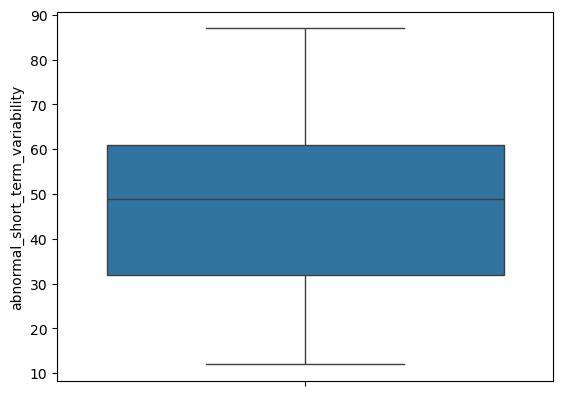

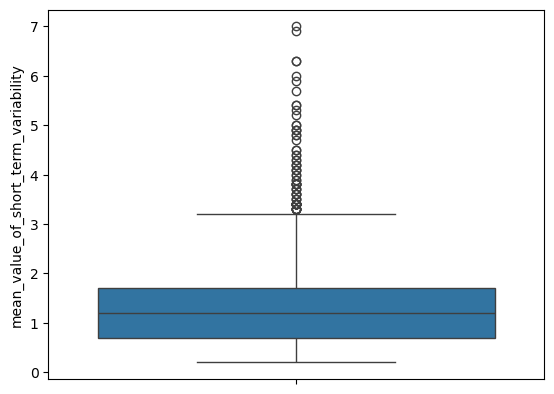

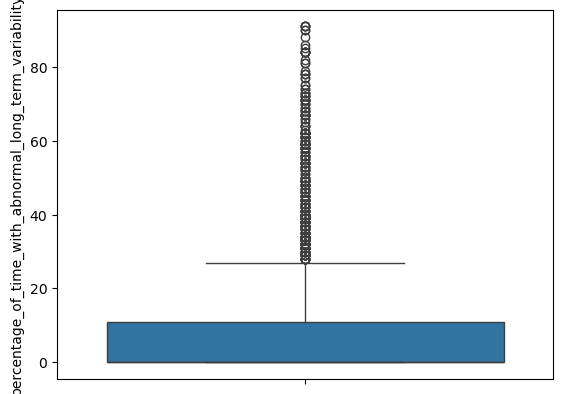

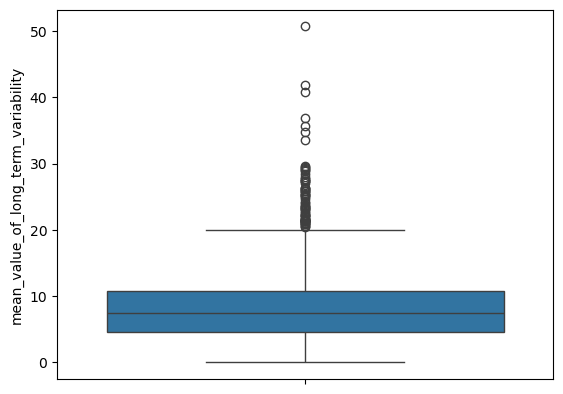

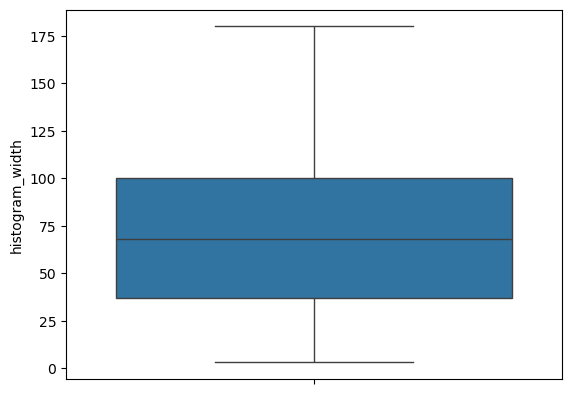

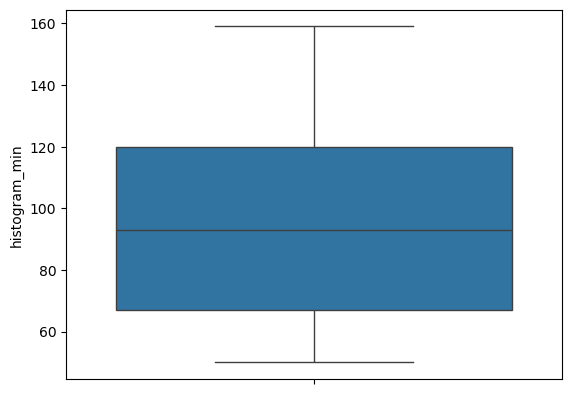

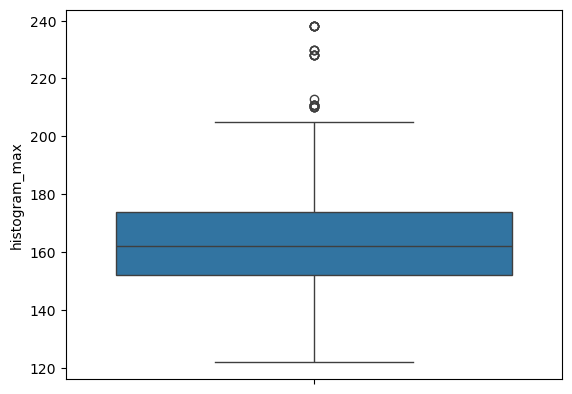

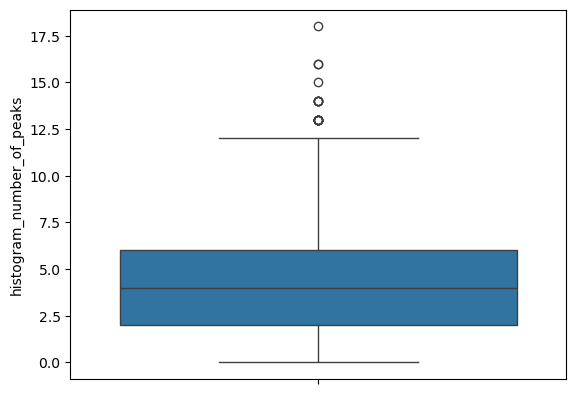

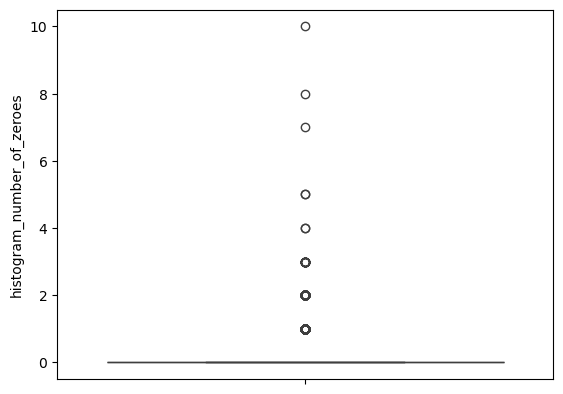

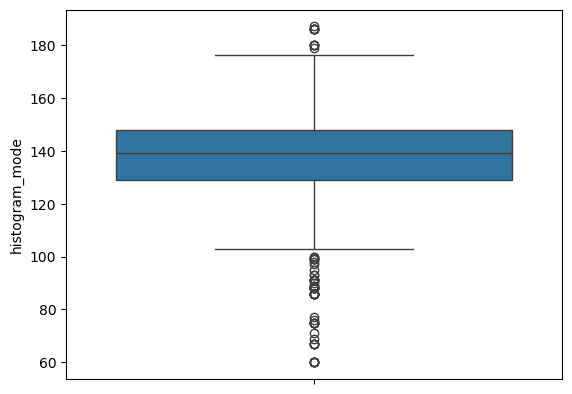

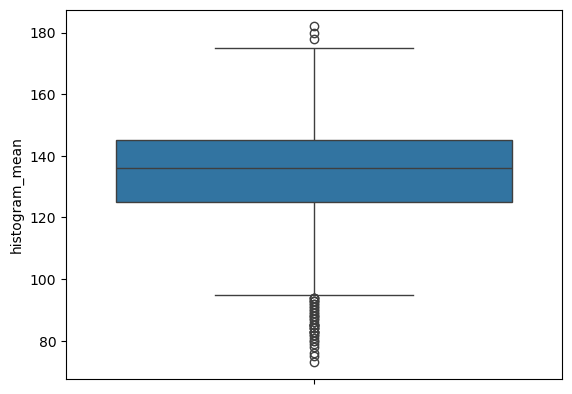

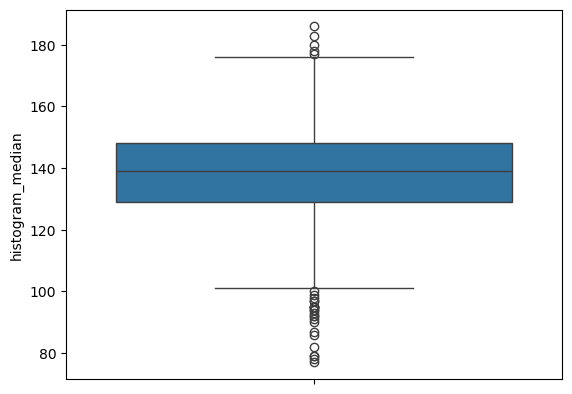

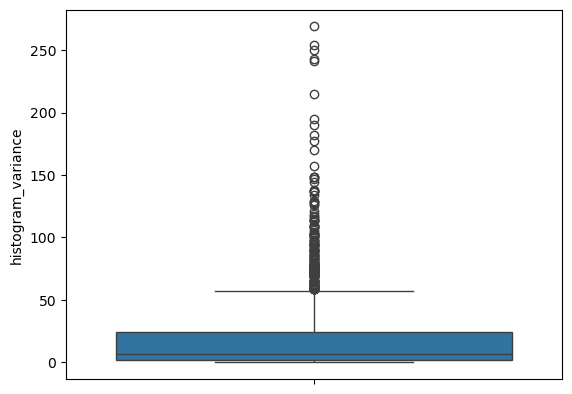

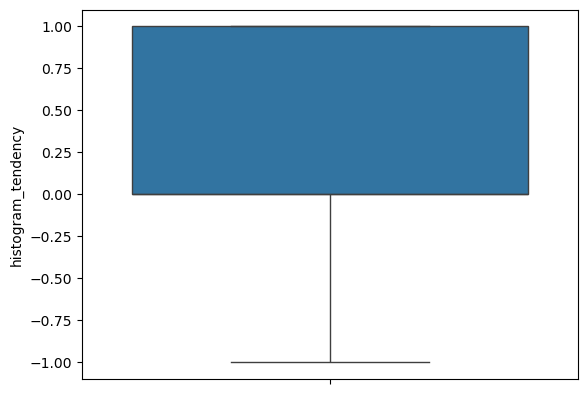

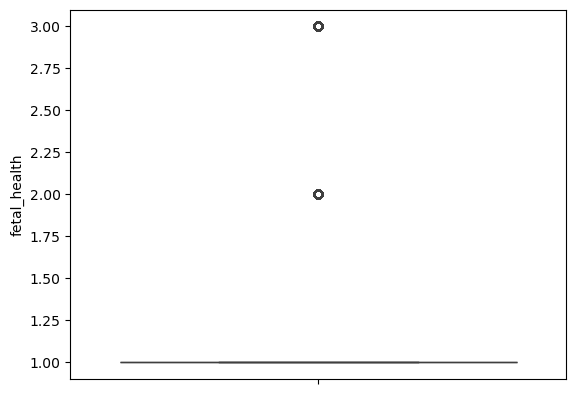

In [17]:
for i in df.columns:
    sns.boxplot(df[i]) 
    plt.show() 

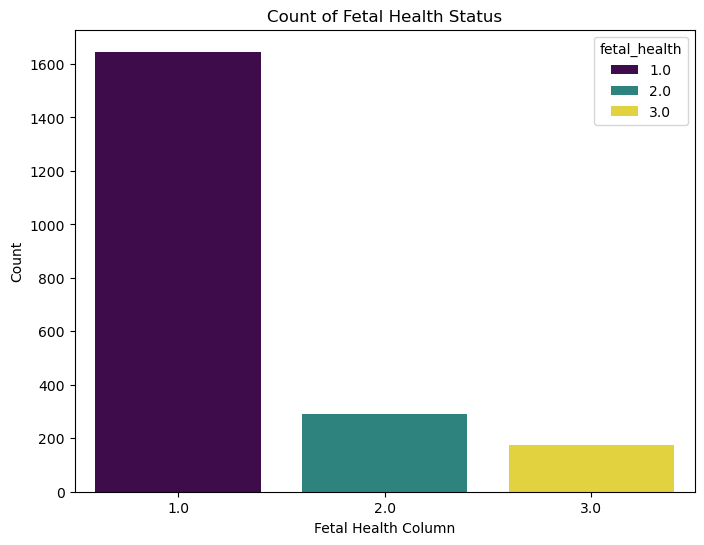

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fetal_health', hue='fetal_health', data=df, palette='viridis')
plt.title('Count of Fetal Health Status')
plt.xlabel('Fetal Health Column')
plt.ylabel('Count')
plt.show() 

In [19]:
df['fetal_health'].value_counts()

fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64

In [20]:
X = df.iloc[:, :-1]
Y = df['fetal_health']

smote = SMOTE(sampling_strategy='auto')
X_smote_resampled, Y_smote_resampled = smote.fit_resample(X, Y)

ros = RandomOverSampler(sampling_strategy='auto')
X_ros_resampled, Y_ros_resampled = ros.fit_resample(X, Y)

rus = RandomUnderSampler(sampling_strategy='auto')
X_rus_resampled, Y_rus_resampled = rus.fit_resample(X, Y)

In [21]:
Y_smote_resampled.value_counts()

fetal_health
2.0    1646
1.0    1646
3.0    1646
Name: count, dtype: int64

In [22]:
Y_ros_resampled.value_counts()

fetal_health
2.0    1646
1.0    1646
3.0    1646
Name: count, dtype: int64

In [23]:
Y_rus_resampled.value_counts()

fetal_health
1.0    175
2.0    175
3.0    175
Name: count, dtype: int64

In [24]:
X_smote_resampled.shape

(4938, 21)

In [25]:
X_ros_resampled.shape

(4938, 21)

In [26]:
X_rus_resampled.shape

(525, 21)

In [27]:
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote_resampled, Y_smote_resampled, test_size=0.3, random_state=42)

In [28]:
x_smote_train.shape, x_smote_test.shape

((3456, 21), (1482, 21))

In [29]:
y_smote_train = y_smote_train.astype(int)
y_smote_test = y_smote_test.astype(int)

In [30]:
y_smote_train.astype, y_smote_test.astype

(<bound method NDFrame.astype of 56      2
 1309    1
 695     3
 1881    1
 4044    3
        ..
 4426    3
 466     3
 3092    2
 3772    3
 860     1
 Name: fetal_health, Length: 3456, dtype: int32>,
 <bound method NDFrame.astype of 1972    1
 4567    3
 151     1
 2423    2
 1412    1
        ..
 263     2
 1393    2
 1957    1
 1186    1
 2629    2
 Name: fetal_health, Length: 1482, dtype: int32>)

In [31]:
model_smote = GradientBoostingClassifier()

model_smote.fit(x_smote_train, y_smote_train)
y_smote_pred = model_smote.predict(x_smote_test)

accuracy_smote = accuracy_score(y_smote_test, y_smote_pred)
print(f"Accuracy of Gradient Boosting with smote: {accuracy_smote}")

Accuracy of Gradient Boosting with smote: 0.9669365721997301


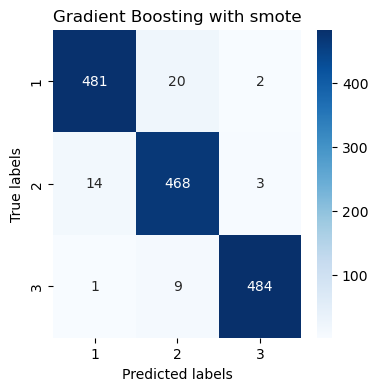

In [32]:
conf_matrix_smote = confusion_matrix(y_smote_test, y_smote_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_smote, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title(f"Gradient Boosting with smote")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show() 

In [33]:
x_ros_train, x_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros_resampled, Y_ros_resampled, test_size=0.3, random_state=42)

In [34]:
x_ros_train.shape, x_ros_test.shape 

((3456, 21), (1482, 21))

In [35]:
y_ros_train = y_ros_train.astype(int)
y_ros_test = y_ros_test.astype(int) 

In [36]:
y_ros_train.astype, y_ros_test.astype

(<bound method NDFrame.astype of 56      2
 1309    1
 695     3
 1881    1
 4044    3
        ..
 4426    3
 466     3
 3092    2
 3772    3
 860     1
 Name: fetal_health, Length: 3456, dtype: int32>,
 <bound method NDFrame.astype of 1972    1
 4567    3
 151     1
 2423    2
 1412    1
        ..
 263     2
 1393    2
 1957    1
 1186    1
 2629    2
 Name: fetal_health, Length: 1482, dtype: int32>)

In [47]:
model_ros = GradientBoostingClassifier()

model_ros.fit(x_ros_train, y_ros_train)
y_ros_pred = model_ros.predict(x_ros_test)

accuracy_ros = accuracy_score(y_ros_test, y_ros_pred)
print(f"Accuracy of Gradient Boosting with ros: {accuracy_ros}")

joblib.dump(model_ros, 'gradient_boosting.pkl')

Accuracy of Gradient Boosting with ros: 0.979757085020243


['gradient_boosting.pkl']

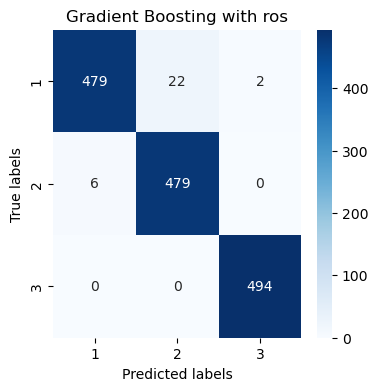

In [38]:
conf_matrix_ros = confusion_matrix(y_ros_test, y_ros_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_ros, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title(f"Gradient Boosting with ros")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show() 

In [39]:
x_rus_train, x_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus_resampled, Y_rus_resampled, test_size=0.3, random_state=42)

In [40]:
x_rus_train.shape, x_rus_test.shape 

((367, 21), (158, 21))

In [41]:
y_rus_train = y_rus_train.astype(int)
y_rus_test = y_rus_test.astype(int)

In [42]:
y_rus_train.astype, y_rus_test.astype

(<bound method NDFrame.astype of 325     2
 1774    3
 1700    1
 1763    3
 9       3
        ..
 1162    1
 2066    1
 819     2
 1489    3
 1075    1
 Name: fetal_health, Length: 367, dtype: int32>,
 <bound method NDFrame.astype of 419     2
 468     3
 1574    1
 336     2
 1073    1
        ..
 342     3
 859     1
 1141    1
 318     2
 169     1
 Name: fetal_health, Length: 158, dtype: int32>)

In [43]:
model_rus = GradientBoostingClassifier()

model_rus.fit(x_rus_train, y_rus_train)
y_rus_pred = model_rus.predict(x_rus_test)

accuracy_rus = accuracy_score(y_rus_test, y_rus_pred)
print(f"Accuracy of Gradient Boosting with rus: {accuracy_rus}")

Accuracy of Gradient Boosting with rus: 0.8607594936708861


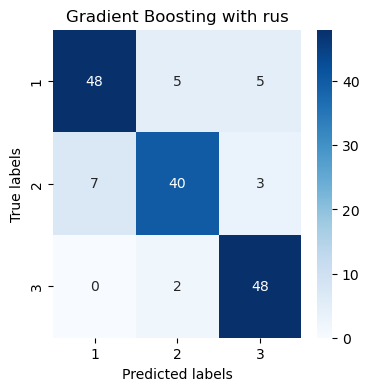

In [44]:
conf_matrix_rus = confusion_matrix(y_rus_test, y_rus_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_rus, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title(f"Gradient Boosting with rus")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show() 

In [45]:
best_accuracy = max(accuracy_smote, accuracy_ros, accuracy_rus) 
print(f"The final accuracy of the Gradient Boosting model is: {best_accuracy:.3f}")

The final accuracy of the Gradient Boosting model is: 0.980
